#  Average Daily Basic Pay of Wage and Salary Workers by Major Industry Group, Philippines: 2016 to January 2024 (in peso) 
problems: 
1. Lorem Ipsum
2. Lorem Ipsum
3. Lorem Ipsum
4. Lorem Ipsum

goal:
1. Lorem Ipsum
2. Lorem Ipsum
3. Lorem Ipsum
4. Lorem Ipsum\
dataset from:

https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__2B__NA__QT__6IOG/0302B5CIGQ1.px/table/tableViewLayout1/?rxid=74acd53e-fa25-42ce-a0a4-fd41ca31b018

# Methodology
1. Reading and Understanding the Data\
a. Creating a Data Dictionary
2. Data Cleaning
3. Data Preparation
4. Statistical Data Analysis\
a. Univariate Analysis\
b. Bivariate Analysis
5. Final Analysis

### 1. Reading and Understanding the Data

In [1]:
# import libraries for dataframe and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# 1. Reading the data on which analysis needs to be done

df = pd.read_excel("imports_of_goods.xlsx", header=3)
df = df[:-31]

df.head(5)

,Unnamed: 0,2000,Unnamed: 2,Unnamed: 3,Unnamed: 4,2001,Unnamed: 6,Unnamed: 7,Unnamed: 8,2002,...,Unnamed: 91,Unnamed: 92,2023,Unnamed: 94,Unnamed: 95,Unnamed: 96,2024,Unnamed: 98,Unnamed: 99,Unnamed: 100
0,NaN,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4,Q1,...,Q3,Q4,Q1,Q2,Q3,Q4,Q1,Q2,Q3,Q4
1,..Electronic products,85792,76324,90811,94936,97396,127887,115015,106784,115849,...,352591,315377,303588,324753,299722,273183,286115,356539,..,..
2,.Components/devices (semiconductors),44451,39542,47041,49166,50614,66437,59581,54966,59107,...,198126,189064,172544,184197,154758,138390,148283,179517,..,..
3,.Electronic data processing,27466,24436,29076,30400,31077,40821,36826,34424,37692,...,61581,55741,41840,46611,46326,45891,46071,59210,..,..
4,.Office equipment,696,619,737,771,795,1043,933,857,907,...,2647,4252,3627,4475,2874,3669,2706,4965,..,..


#### Creating a Data Dictionary

In [3]:
# Extract the first row which contains the quarters
quarters = df.iloc[0]

# Drop the first row as it will be used for the header
df = df.drop(0).reset_index(drop=True)

# Create new column names by appending the year to the quarter
new_columns = []
current_year = None
for col, quarter in zip(df.columns, quarters):
    if 'Unnamed' not in col:
        current_year = col.split()[0]  # Update the current year
    if pd.notna(quarter):
        new_columns.append(f"{current_year} {quarter}")
    else:
        new_columns.append(col)

# Assign the new column names to the dataframe
df.columns = new_columns

# Drop the first row as it is now part of the header
df = df.drop(0)



In [4]:
# Display the updated dataframe
df.head(5)

,Unnamed: 0,2000 Q1,2000 Q2,2000 Q3,2000 Q4,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,...,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1,2024 Q2,2024 Q3,2024 Q4
1,.Components/devices (semiconductors),44451,39542,47041,49166,50614,66437,59581,54966,59107,...,198126,189064,172544,184197,154758,138390,148283,179517,..,..
2,.Electronic data processing,27466,24436,29076,30400,31077,40821,36826,34424,37692,...,61581,55741,41840,46611,46326,45891,46071,59210,..,..
3,.Office equipment,696,619,737,771,795,1043,933,857,907,...,2647,4252,3627,4475,2874,3669,2706,4965,..,..
4,.Consumer electronics,4129,3674,4372,4573,4676,6141,5537,5170,5658,...,21374,13560,11765,18495,20354,18860,16794,29836,..,..
5,.Telecommunication,3818,3397,4043,4229,4345,5704,5120,4736,5175,...,24851,19443,23297,23343,24982,20734,23328,28927,..,..


In [5]:
df.rename(columns={df.columns[0]: 'items'}, inplace=True)
df.head(5)

,items,2000 Q1,2000 Q2,2000 Q3,2000 Q4,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,...,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1,2024 Q2,2024 Q3,2024 Q4
1,.Components/devices (semiconductors),44451,39542,47041,49166,50614,66437,59581,54966,59107,...,198126,189064,172544,184197,154758,138390,148283,179517,..,..
2,.Electronic data processing,27466,24436,29076,30400,31077,40821,36826,34424,37692,...,61581,55741,41840,46611,46326,45891,46071,59210,..,..
3,.Office equipment,696,619,737,771,795,1043,933,857,907,...,2647,4252,3627,4475,2874,3669,2706,4965,..,..
4,.Consumer electronics,4129,3674,4372,4573,4676,6141,5537,5170,5658,...,21374,13560,11765,18495,20354,18860,16794,29836,..,..
5,.Telecommunication,3818,3397,4043,4229,4345,5704,5120,4736,5175,...,24851,19443,23297,23343,24982,20734,23328,28927,..,..


In [6]:
df['items'] = df['items'].str.replace('.', '', regex=False)
df.tail(5)

,items,2000 Q1,2000 Q2,2000 Q3,2000 Q4,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,...,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1,2024 Q2,2024 Q3,2024 Q4
26,Fruits and vegetables,3138,3282,4191,4549,3344,4275,3386,3823,3530,...,20788,25914,17979,20433,21130,29226,19481,24703,..,..
27,Professional scientific apparatus,3515,3688,4428,4430,4473,4344,4250,3225,3227,...,25619,22509,25709,19797,22440,20786,24415,19972,..,..
28,Articles of apparel,933,808,850,1128,771,844,773,788,572,...,13664,14941,10328,12156,12243,15681,12447,11977,..,..
29,Other imports of goods,30416,34759,43105,44310,43683,35672,43046,43976,39630,...,587358,358391,411937,391211,549921,336219,402354,411905,..,..
30,Imports of Goods,273370,283427,340648,354458,345841,368908,372052,328566,324399,...,2317216,1886314,2004045,1966285,2117697,1834576,1931346,2122326,..,..


In [7]:
# creating data dictionary

import_def = {
    "item" : "items imported by the country",
}

data_dictionary_import = pd.DataFrame({
    'Column Name': df.columns,
    'Definition': [import_def.get(col, 'Year and Quadrant values') for col in df.columns],
    'Data Type': df.dtypes.values
})

In [8]:
data_dictionary_import

,Column Name,Definition,Data Type
0,items,Year and Quadrant values,object
1,2000 Q1,Year and Quadrant values,object
2,2000 Q2,Year and Quadrant values,object
3,2000 Q3,Year and Quadrant values,object
4,2000 Q4,Year and Quadrant values,object
...,...,...,...
96,2023 Q4,Year and Quadrant values,object
97,2024 Q1,Year and Quadrant values,object
98,2024 Q2,Year and Quadrant values,object
99,2024 Q3,Year and Quadrant values,object


In [9]:
df.describe()
# there are .. values in the Quadrants 3 and 4 of the year 2024.

,items,2000 Q1,2000 Q2,2000 Q3,2000 Q4,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,...,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1,2024 Q2,2024 Q3,2024 Q4
count,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
unique,30,30,30,30,30,30,30,29,30,30,...,30,30,30,30,30,30,30,30,1,1
top,Components/devices (semiconductors),44451,39542,47041,49166,50614,66437,3386,54966,59107,...,198126,189064,172544,184197,154758,138390,148283,179517,..,..
freq,1,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,1,1,30,30


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 1 to 30
Columns: 101 entries, items to 2024 Q4
dtypes: object(101)
memory usage: 23.8+ KB


### 2. Data Cleaning

In [11]:
# It was stated in the dataset that all values with .. are equal to 0.
df['2024 Q3'] = df['2024 Q3'].replace('..', 0)
df['2024 Q4'] = df['2024 Q4'].replace('..', 0)

# Display the updated dataframe to verify the changes
df.tail(5)

,items,2000 Q1,2000 Q2,2000 Q3,2000 Q4,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,...,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1,2024 Q2,2024 Q3,2024 Q4
26,Fruits and vegetables,3138,3282,4191,4549,3344,4275,3386,3823,3530,...,20788,25914,17979,20433,21130,29226,19481,24703,0,0
27,Professional scientific apparatus,3515,3688,4428,4430,4473,4344,4250,3225,3227,...,25619,22509,25709,19797,22440,20786,24415,19972,0,0
28,Articles of apparel,933,808,850,1128,771,844,773,788,572,...,13664,14941,10328,12156,12243,15681,12447,11977,0,0
29,Other imports of goods,30416,34759,43105,44310,43683,35672,43046,43976,39630,...,587358,358391,411937,391211,549921,336219,402354,411905,0,0
30,Imports of Goods,273370,283427,340648,354458,345841,368908,372052,328566,324399,...,2317216,1886314,2004045,1966285,2117697,1834576,1931346,2122326,0,0


In [12]:
# Convert all columns except 'items' to float
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Display the updated dataframe to verify the changes
df.head(5)

,items,2000 Q1,2000 Q2,2000 Q3,2000 Q4,2001 Q1,2001 Q2,2001 Q3,2001 Q4,2002 Q1,...,2022 Q3,2022 Q4,2023 Q1,2023 Q2,2023 Q3,2023 Q4,2024 Q1,2024 Q2,2024 Q3,2024 Q4
1,Components/devices (semiconductors),44451.0,39542.0,47041.0,49166.0,50614.0,66437.0,59581.0,54966.0,59107.0,...,198126.0,189064.0,172544.0,184197.0,154758.0,138390.0,148283.0,179517.0,0.0,0.0
2,Electronic data processing,27466.0,24436.0,29076.0,30400.0,31077.0,40821.0,36826.0,34424.0,37692.0,...,61581.0,55741.0,41840.0,46611.0,46326.0,45891.0,46071.0,59210.0,0.0,0.0
3,Office equipment,696.0,619.0,737.0,771.0,795.0,1043.0,933.0,857.0,907.0,...,2647.0,4252.0,3627.0,4475.0,2874.0,3669.0,2706.0,4965.0,0.0,0.0
4,Consumer electronics,4129.0,3674.0,4372.0,4573.0,4676.0,6141.0,5537.0,5170.0,5658.0,...,21374.0,13560.0,11765.0,18495.0,20354.0,18860.0,16794.0,29836.0,0.0,0.0
5,Telecommunication,3818.0,3397.0,4043.0,4229.0,4345.0,5704.0,5120.0,4736.0,5175.0,...,24851.0,19443.0,23297.0,23343.0,24982.0,20734.0,23328.0,28927.0,0.0,0.0


<Axes: >

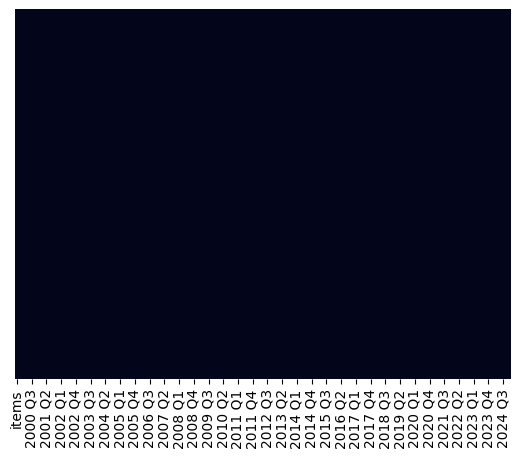

In [13]:
# check for nulls
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [14]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

# there are no missing values in the dataset

items      0.0
2000 Q1    0.0
2000 Q2    0.0
2000 Q3    0.0
2000 Q4    0.0
          ... 
2023 Q4    0.0
2024 Q1    0.0
2024 Q2    0.0
2024 Q3    0.0
2024 Q4    0.0
Length: 101, dtype: float64

In [15]:
# Check for duplicates in the dataframe
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### 3. Data Preparation

    Test kung makakapag-push na ako hehe